# Week 4 - Geopandas 

### Working with geospatial data 

[Link to lesson](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-10-geopandas-intro/lesson-10-geopandas-intro.html)

Date: 2024-10-23


## About the data 

Wild pigs (Sus scrofa) are a destructive invasive species in California. In this lesson we will use simplified point data about wild pig sightings in California from the Global Biodiversity Information Facility (GBIF).

## Reproducible file paths 

Import packages: 

In [1]:
import os # operating system 
import geopandas as gpd 
import matplotlib.pyplot as plt 

Use the `os` package to create a reporducible file path 

- If you use `' ', ' '` this to give the file path, it shouldn't break for Mac or Linux systems. 
- This avoids errors and makes your code more portable 

In [4]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

We can then use this file path to read in a shapefile with geopandas by using the `geopandas.read_file()` function:

In [5]:
pigs = gpd.read_file(fp)
pigs.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [7]:
fp = os.path.join('data','ca_boundary', 'ca_state_boundary.shp')
ca_boundary = gpd.read_file(fp)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


Even though we only read in the `.shp` file, we need all the other file types in the same folder in order for it to work.


## `GeoSeries` and `GeoDataFrame`

The **geometry column** in a `geopandas.GeoDataFrame` holds the geometry (point, polygon, etc) of each spatial feature. This geometry column is of type `geopandas.GeoSeries`. 


Columns in the `geopandas.GeoDataFrame` with attributes about the features are `pandas.Series` like in a regular `pandas.DataFrame`.

### Example

Notice the `geometry` column in the `pigs` geo-dataframe:

In [8]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [10]:
# Check what type of object is pigs 
print(type(pigs))

# Check what kind of object is the geometry column 
print(type(pigs.geometry))

# Check what kind of object is the species column 
print(type(pigs.species))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The data type of the geometry column is also reflected when we look at the data types of the values in each column:

In [11]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [12]:
# Check the geomtry type of each element in the geometry column 
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

### Check in 
What is the geom type of the single feature in the CA state boundary? And why does it make sense to have this type of geometry? 

In [13]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS and extent 

CRS = coordinate reference system and it is one of the basic information pieces for geospatial data. 

We can think of the CRS as instructions to locate each spatial feature of our data frame on the surface of the Earth. 

In [14]:
# Access the CRS of the GeoDataFrame 
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

CRS: EPSG:4326 is the most common. Used by google earth, the dept. of defense, and most GPS systems.

EPSG = European Petroleum Service Group

In [15]:
# Get more info about the CRS 
print('ellispoid: ', pigs.crs.ellipsoid)
print('datum: ', pigs.crs.datum)
print('is geographic: ', pigs.crs.is_geographic)
print('is projected? ', pigs.crs.is_projected)

ellispoid:  WGS 84
datum:  World Geodetic System 1984 ensemble
is geographic:  True
is projected?  False


**What are the ellipsoid and the datum? What does it tell us about the CRS? **
- The shape of the earth to which you allin the datum. Grounding it on the earth. 

**What does it mean that the CRS is geographic and not projected?** 
- Geographic is still thinking about the earth as one, 3D. Projected is taking the 3D earth and arranging it on a flat surface.


### Extent 
The **extent** of the geo-dataframe is the bounding box covering all the spatial features in our geo-dataframe. This is formed by finding the points that are furthest west, east, south, and north.

In [16]:
# Obtain the geographic extent of the geo-dataframe 
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Check-in 

Print the CRS and extent for the CA boundary. Are both dataframes in the same CRS?

In [17]:
print(ca_boundary.crs)
print(ca_boundary.total_bounds)

epsg:4326
[-124.48201686   32.52883674 -114.13122248   42.00950827]


In [18]:
# Check if the CRS matches 
pigs.crs == ca_boundary.crs

True

## Data wrangling

`GeoPandas` is conveniently built on top of `pandas`, so we may use everything we have learned about data selection, wrangling, and modification for a `pandas.DataFrame` to wrange `geopandas.GeoDataFrames`.

Ex. 

We only want to use recent data for wild pig observations 

In [19]:
# Examine pig observation by year
# value_counts() counts the amount of observations per year
# sort_index() orders the years 
pigs['year'].value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [22]:
# Select data from 2020 onwards 
pigs_recent = pigs[pigs.year>= 2020]

# Check the length of orginial data frame
print('Total num of obs: ', len(pigs))

# Check length of new data frame 
print('Number of obs since 2020: ', len(pigs_recent))

Total num of obs:  1046
Number of obs since 2020:  606


## Create a map 

Similarly to a `pandas.DataFrame`, a `geopandas.GeoDataFrame` has a `plot()` method that we can call directly to create a quick view of our data. The geospatial information of the geopandas.GeoDataFrame will be used to create the axes of the plot.

<AxesSubplot:>

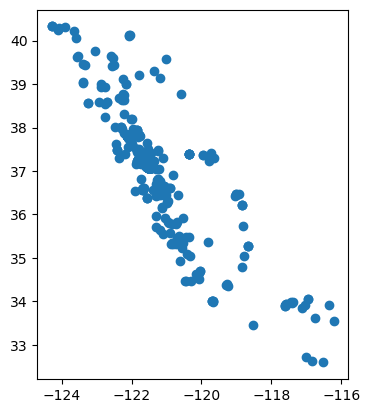

In [23]:
# Look at the recent dataframe 
pigs_recent.plot()

## `matplotlib`’s `fig` and `ax`

Matplotlib graphs the data in a **figure** which can have one or more **axes**. 

The axes is only the area specified by the *x* axis and *y* axis and what is plotted in it, while the figure can icnlude multiple axes in it.


To create a new blank figure:

1. Initialize a new figure and axes by calling pyplot’s `subplots()` function.
2. Show the graph using plt.show():

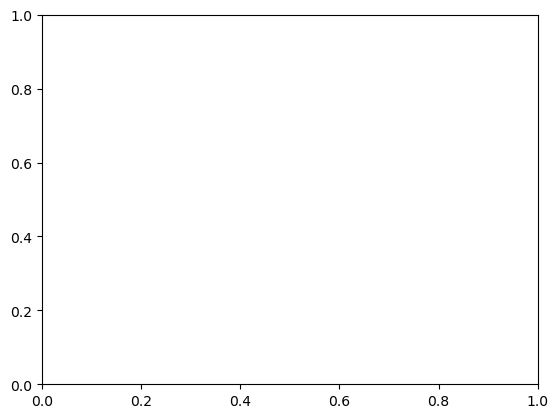

In [24]:
# 1. Initialize empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Display figure
plt.show()

## Adding a layer 

When using `matplotlib`, it can be useful to think of creating a plot as adding layers to an axis. The general syntax to plot a datafram `df` onto an axis is:

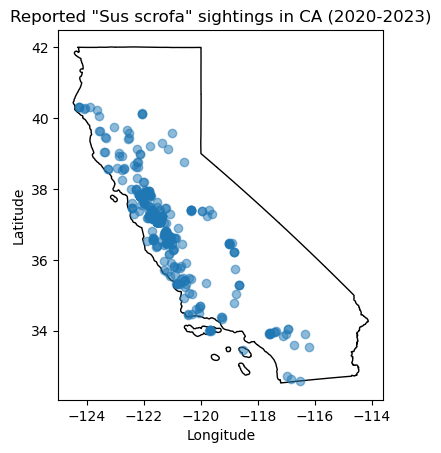

In [29]:
# Initialize empty figure and axis
fig, ax = plt.subplots()

# Add CA boundary 
ca_boundary.plot(ax=ax,
                color ='none',
                edgecolor='black')

# Plot pig points 
pigs_recent.plot(ax=ax,
                alpha=0.5) 

# Customization 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()